In [1]:
#加载本次数据中用到的python库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x, 'max_colwidth', 100)

#读取wine-reviews中的数据
dataload1 = pd.read_csv('winemag-data-130k-v2.csv')  # 读取表1中的数据
dic1 = {'attribute': [], 'max': [], 'min': [], 'mean': [], 'median': [], 'quantile': [],
        'num_NA': []}  # 属性，最大值、最小值、中位数、均值、四分位数及缺失值的个数
count1 = []  # 频数
for key in dataload1.keys():
    d = dataload1[key]
    if np.issubdtype(d.dtypes, np.number):  # 判断属性类型
        l = [key, d.max(), d.min(), d.mean(), d.median(), (d.quantile(0.25), d.quantile(0.5), d.quantile(0.75)),
             sum(d.isnull())]  # 统计数值属性的最大、最小、均值、中位数、四分位数及缺失值的个数
        for k, i in zip(dic1.keys(), l):
            dic1[k].append(i)
    else:
        count1.append(d.value_counts())  # 统计标称属性取值的频数

dataload2 = pd.read_csv('winemag-data_first150k.csv')  # 读取表2中的数据
dic2 = {'attribute': [], 'max': [], 'min': [], 'mean': [], 'median': [], 'quantile': [], 'miss_NA': []}
count2 = []
for key in dataload2.keys():
    d = dataload2[key]
    if np.issubdtype(d.dtypes, np.number):
        l = [key, d.max(), d.min(), d.mean(), d.median(), (d.quantile(0.25), d.quantile(0.5), d.quantile(0.75)),
             sum(d.isnull())]  # 统计数值属性的最大、最小、均值、中位数、四分位数及缺失值的个数
        for k, i in zip(dic2.keys(), l):
            dic2[k].append(i)
    else:
        count2.append(d.value_counts())  # 统计标称属性取值的频数

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


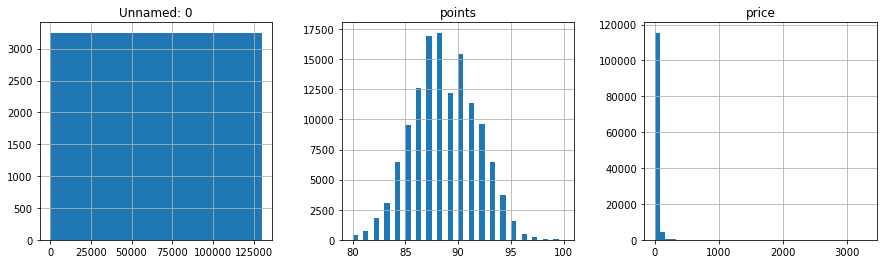

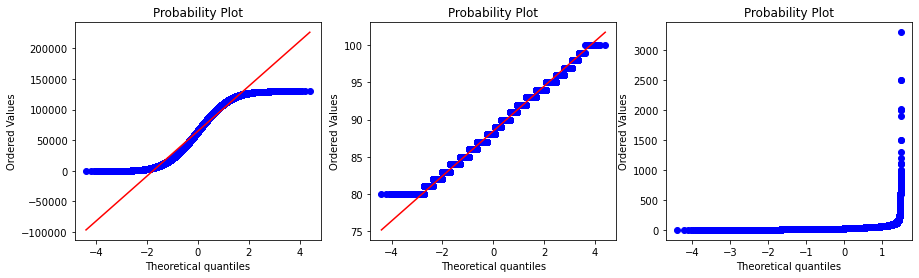

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


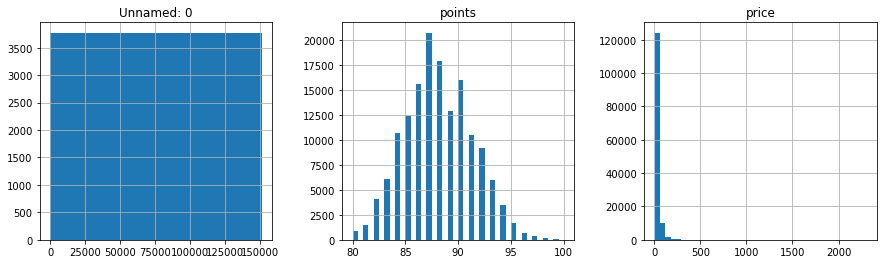

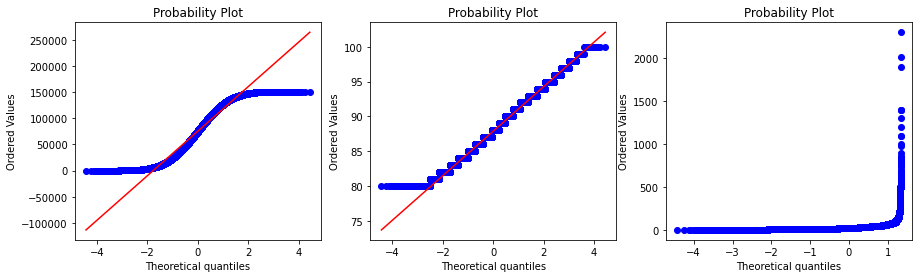

In [3]:
#观察两个表中的数据分布
dataload1.hist(layout=(1,3),bins=40,figsize=(15,4))
l = ['Unnamed: 0','points','price']
plt.figure(figsize=(15, 4))
for i in range(len(l)):
    plt.subplot(130+i+1)
    stats.probplot(dataload1[l[i]],plot=plt)
plt.show()
dataload2.hist(layout=(1,3),bins=40,figsize=(15,4))
plt.figure(figsize=(15, 4))
for i in range(len(l)):
    plt.subplot(130+i+1)
    stats.probplot(dataload2[l[i]],plot=plt)
plt.show()

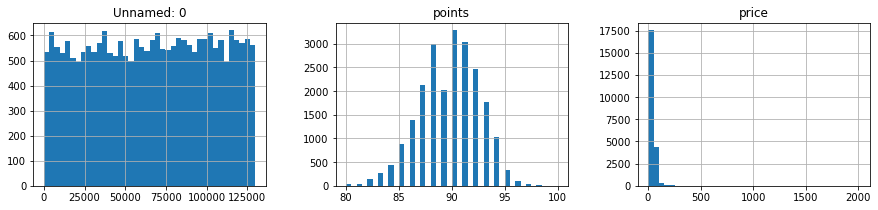

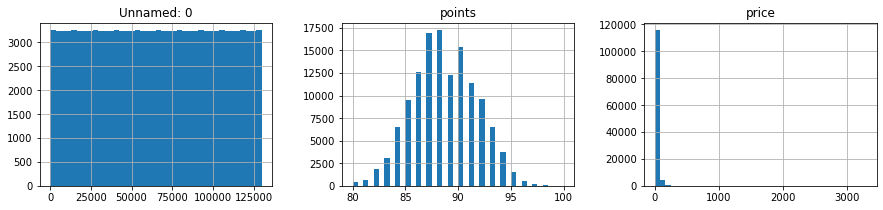

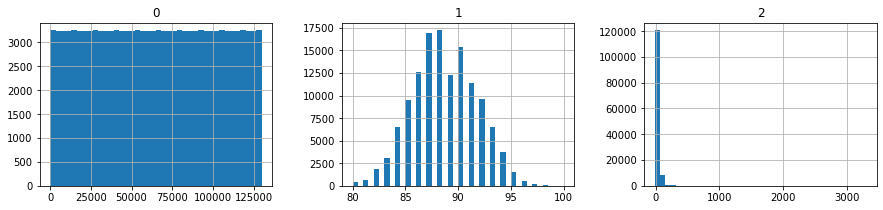

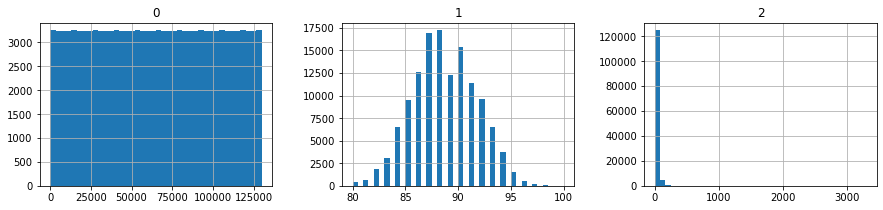

In [5]:
#四种缺失值处理方法
import impyute as impy
data_drop = dataload1.dropna()#将缺失值剔除
data_drop.hist(layout=(1,3),bins=40,figsize=(15,3))

data_mode = dataload1.fillna(dataload1.mode())#用最高频率纸填补缺失值
data_mode.hist(layout=(1,3),bins=40,figsize=(15,3))

data = dataload1[['Unnamed: 0','points','price']]
nd = np.array(data)
filled_mice = impy.mice(nd)#通过属性的相关关系来填补缺失值
data_mice = pd.DataFrame(filled_mice)
data_mice.hist(layout=(1,3),bins=40,figsize=(15,3))

filled_knn = impy.fast_knn(nd,k=3)#通过数据对象之间的相似性来填补缺失值
data_knn = pd.DataFrame(filled_knn)
data_knn.hist(layout=(1,3),bins=40,figsize=(15,3))

plt.show()

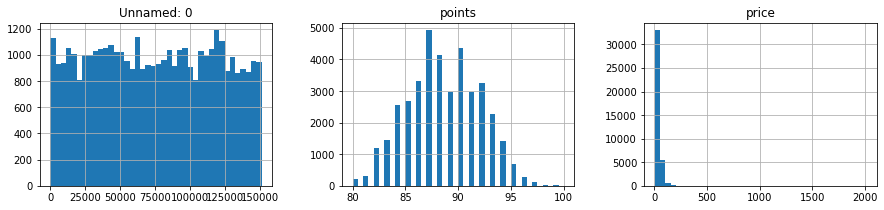

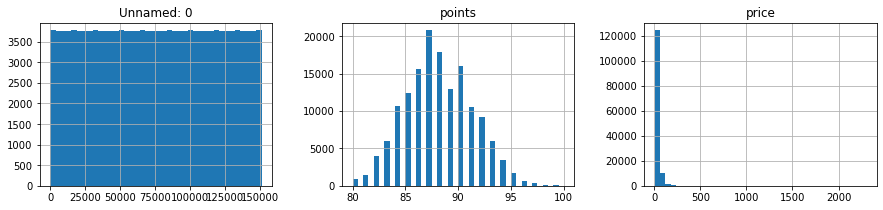

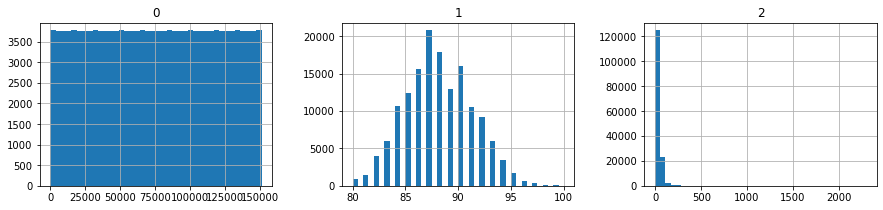

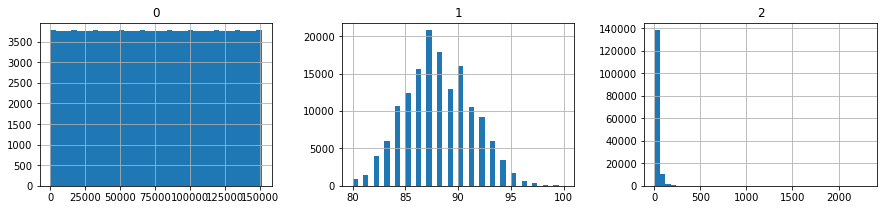

In [7]:
data_drop = dataload2.dropna()#将缺失值剔除
data_drop.hist(layout=(1,3),bins=40,figsize=(15,3))

data_mode = dataload2.fillna(dataload2.mode())#用最高频率纸填补缺失值
data_mode.hist(layout=(1,3),bins=40,figsize=(15,3))

data = dataload2[['Unnamed: 0','points','price']]
nd = np.array(data)
filled_mice = impy.mice(nd)#通过属性的相关关系来填补缺失值
data_mice = pd.DataFrame(filled_mice)
data_mice.hist(layout=(1,3),bins=40,figsize=(15,3))

filled_knn = impy.fast_knn(nd,k=3)#通过数据对象之间的相似性来填补缺失值
data_knn = pd.DataFrame(filled_knn)
data_knn.hist(layout=(1,3),bins=40,figsize=(15,3))
plt.show()

In [ ]:
#可以看到用四种处理缺失值处理方法得到的数据有一定的差别，可以根据数据的不同属性来选择不同的数据处理方法，方便后续进行数据分析和预测。

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less

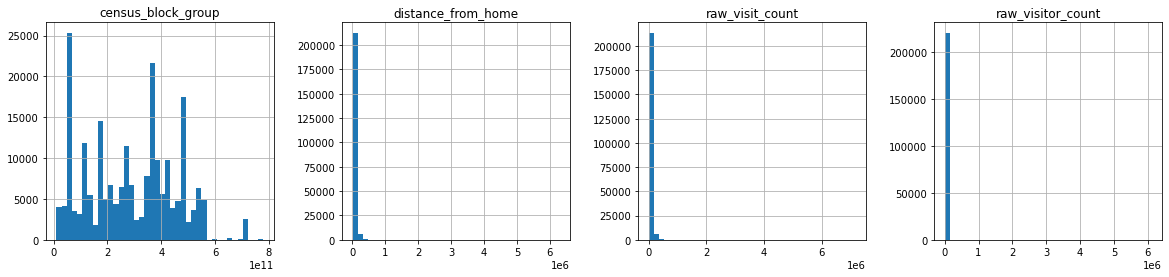

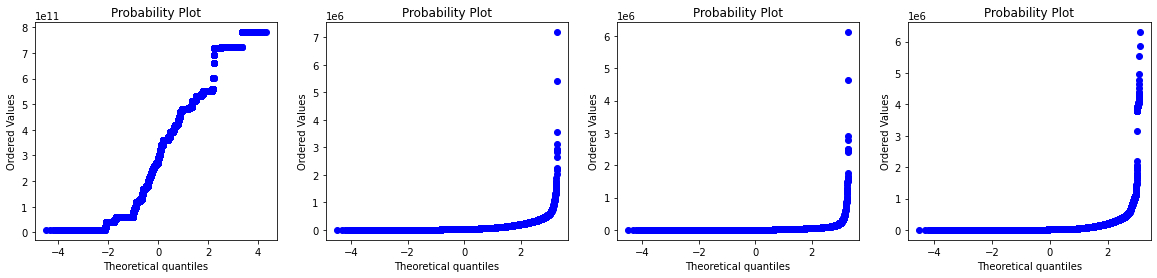

In [9]:
#读取visit-patterns-by-census-block-group中的数据
dataload3 = pd.read_csv('cbg_patterns.csv')  # 读取数据集2中的数据
dataload3 = dataload3.drop(['date_range_start', 'date_range_end', 'visitor_work_cbgs', 'visitor_home_cbgs'], axis=1)
dic3 = {'attribute': [], 'max': [], 'min': [], 'mean': [], 'median': [], 'quantile': [], 'miss_NA': []}
count3 = []
for key in dataload3.keys():
    d = dataload3[key]
    if np.issubdtype(d.dtypes, np.number):
        l = [key, d.max(), d.min(), d.mean(), d.median(), (d.quantile(0.25), d.quantile(0.5), d.quantile(0.75)),
             sum(d.isnull())]  # 统计数值属性的最大、最小、均值、中位数、四分位数及缺失值的个数
        for k, i in zip(dic3.keys(), l):
            dic3[k].append(i)
    else:
        count3.append(d.value_counts())  # 统计标称属性取值的频数
dataload3.hist(layout=(1,4),bins=40,figsize=(20,4))
l = ['census_block_group','raw_visit_count','raw_visitor_count','distance_from_home']
plt.figure(figsize=(20, 4))
for i in range(len(l)):
    plt.subplot(140+i+1)
    stats.probplot(dataload3[l[i]],plot=plt)
plt.show()
#观察visit-patterns-by-census-block-group的数据分布

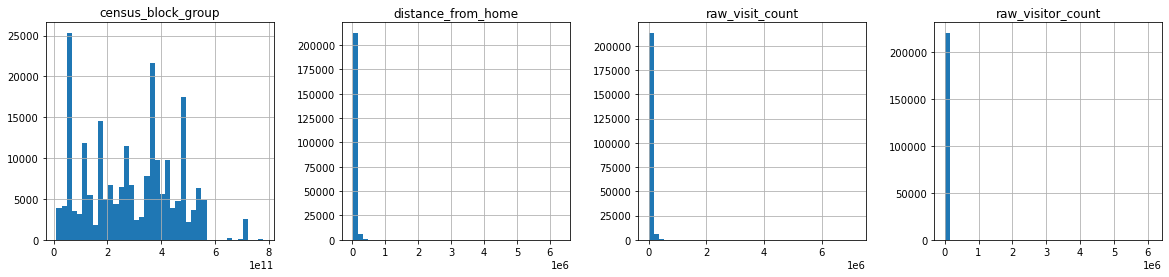

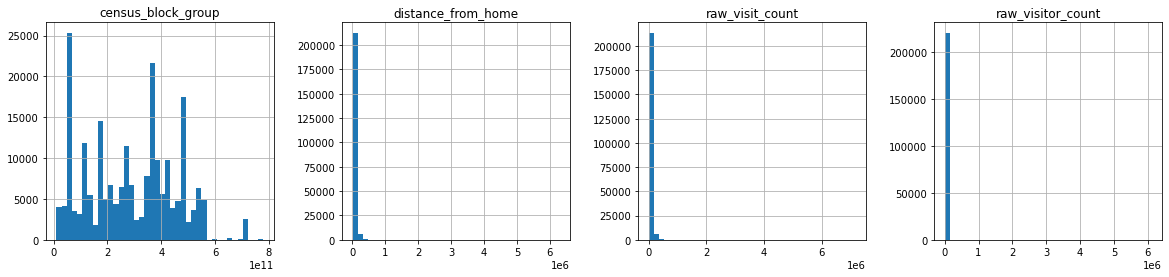

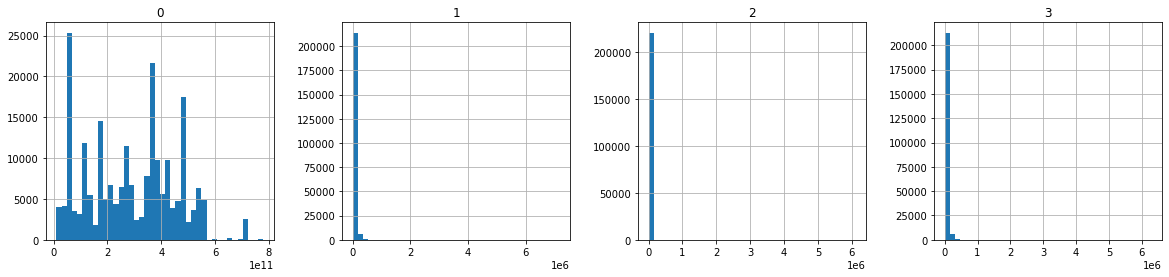

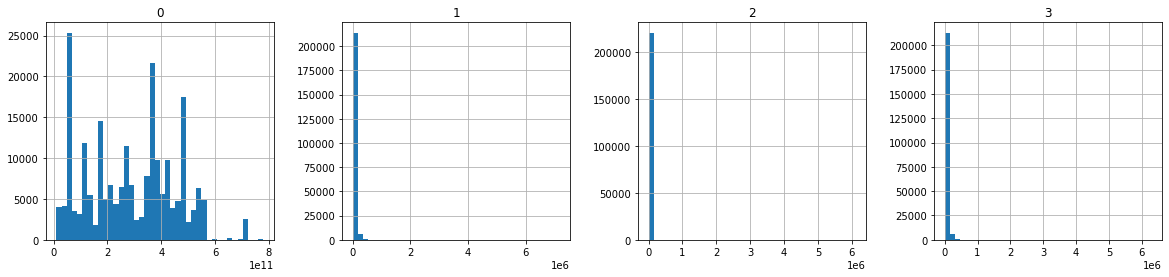

In [10]:
#四种缺失值处理方法
data_drop = dataload3.dropna()#将缺失值剔除
data_drop.hist(layout=(1,4),bins=40,figsize=(20,4))

data_mode = dataload3.fillna(dataload3.mode())#用最高频率纸填补缺失值
data_mode.hist(layout=(1,4),bins=40,figsize=(20,4))

data = dataload3[['census_block_group','raw_visit_count','raw_visitor_count','distance_from_home']]
nd = np.array(data)
filled_mice = impy.mice(nd)#通过属性的相关关系来填补缺失值
data_mice = pd.DataFrame(filled_mice)
data_mice.hist(layout=(1,4),bins=40,figsize=(20,4))

filled_knn = impy.fast_knn(nd,k=3)#通过数据对象之间的相似性来填补缺失值
data_knn = pd.DataFrame(filled_knn)
data_knn.hist(layout=(1,4),bins=40,figsize=(20,4))

plt.show()

In [ ]:
#小结：在本次实验中处理了wine-reviews和visit-patterns-by-census-block-group两个数据集中的数据，针对标称属性数据集中的每个可能会聚会的频数，针对数值属性，给出了5数概括及缺失值的个数，
#并使用直方图、盒图等检查数据分布及离群点对数据进行可视化，进一步观察数据特点
#在缺失值处理环节中，使用了四种缺失值处理方法并对处理后的数据进行了可视化，观察数据特点，
#发现用四种处理缺失值处理方法得到的数据有一定的差别，可以根据数据的不同属性来选择不同的数据处理方法，方便后续进行数据分析和预测